# Solving Non-linear Equations and Optimisation

The package Roots (https://github.com/JuliaMath/Roots.jl) provides methods for solving a non-linear equation (one variable, one function). If you have a system of non-linear equations, try NLsolve.jl (https://github.com/JuliaNLSolvers/NLsolve.jl).

The package Optim (https://github.com/JuliaNLSolvers/Optim.jl) provides powerful methods for optimisation. It can easily handle objective functions with several choice variables. As an alternative, consider the NLopt.jl package (https://github.com/JuliaOpt/NLopt.jl).

# Load Packages

In [1]:
using Dates, Roots, Optim
           
include("printmat.jl")   

printlnPs (generic function with 2 methods)

In [2]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Defining and Plotting the Function

The next few cells define a fairly simple function and then plots it.

In [3]:
function fn1(x,c)                    #notice: the function has two arguments
  value = 2*(x - 1.1)^2 - c
  return value
end  

fn1 (generic function with 1 method)

In [4]:
x = [1,1.5] 
y = fn1.(x,0.5)                   #calling on the function
println("x and the result from the function fn1.(x,0.5): ")
printmat([x y])

x and the result from the function fn1.(x,0.5): 
     1.000    -0.480
     1.500    -0.180



## Plotting the Function

If possible, plot your function. Maybe you see something strange (local minima?). It also helps you set the initial guesses (or brackets) for root solving and optimization.

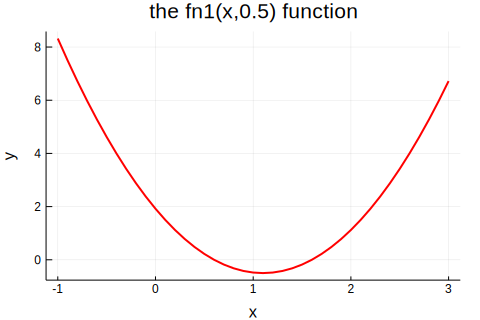

In [5]:
x = -1:0.1:3

p1 = plot(x,fn1.(x,0.5),color=:red,linewidth=2,legend=nothing)
title!("the fn1(x,0.5) function")
xlabel!("x")
ylabel!("y")

The minimum appears to be around 1.1 and the two roots around 0.6 and 1.6.

# Solving a Non-Linear Equation

The Roots package wants a function with only one input. An easy way to turn ```fn1(a,0.5)``` into that form is by defining an anonymous function:
```
x->fn1(x,0.5)
```

Running 
```
find_zero(x->fn1(x,0.5),(x₀,x₁))
```
searches for a root in the [x₀,x₁] interval. Alternatively, you can also do 
```
find_zero(x->fn1(x,0.5),x₂)
``` 
where `x₂` is a single starting guess.

Instead, running
```
find_zeros(x->fn1(x,0.5),x₀,x₁)
```
searches for all roots between x₀ and x₁. (Notice the *s* in `find_zeros`.)

If you want to solve a *system* of non-linear equations, try the NLsolve.jl package.

In [6]:
x1 = find_zero(x->fn1(x,0.5),(-1,1))            #searches for roots in [-1,1]
printlnPs("at which x is fn1(x,0.5) = 0? ",x1)

x2 = find_zero(x->fn1(x,0.5),2)              #searches for roots around 2
printlnPs("at which x is fn1(x,0.5) = 0? ",x2)

println("\nyes, there are several roots. Just look at it (in the plot)")

at which x is fn1(x,0.5) = 0?      0.600
at which x is fn1(x,0.5) = 0?      1.600

yes, there are several roots. Just look at it (in the plot)


In [7]:
x1 = find_zeros(x->fn1(x,0.5),-1,3)            #find_zeros (notice the "s")
                                                    
printlnPs("at which x is fn1(x,0.5) = 0? ",x1)       

at which x is fn1(x,0.5) = 0?      0.600     1.600


# Optimization with One Choice Variable

Running 
```
Sol = optimize(x->fn1(x,0.5),x₀,x₁)
```
finds the `x` value (in the interval `[x₀,x₁]`) that *minimizes* `fn1(x,0.5)`.

The output (`Sol`) contains a lot of information. Print it to see, and extract the optimal `x` value as in the cell below.

In [8]:
Sol = optimize(x->fn1(x,0.5),-2.0,3.0)            

printlnPs("The minimum is at: ", Optim.minimizer(Sol))
println("Compare with the plot above\n")   

println(Sol)

The minimum is at:      1.100
Compare with the plot above

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-2.000000, 3.000000]
 * Minimizer: 1.100000e+00
 * Minimum: -5.000000e-01
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6


## (extra) One Choice Variable: Supplying a Starting Guess Instead

If you prefer to give a starting guess `x₀` instead of an interval, then supply it as as vector `[x₀]`:
```
Sol = optimize(x->fn1(first(x),0.5),[x₀],LBFGS())  
```
Notice: *(a)* `first(x)` to make it a function of the first element in the vector; *(b)* choose the `LBFGS()` method since the default method does not work in the case of only one choice variable.

In [9]:
Solb = optimize(x->fn1(first(x),0.5),[0.1],LBFGS())          

printlnPs("The minimum is at: ", Optim.minimizer(Solb))

The minimum is at:      1.100


# Optimization with Several Choice Variables

The function `fn2(x,0.05)` (defined below) takes a vector `x` as input. Therefore, running 
```
Sol = optimize(x->fn2(x,0.5),x₀)
```
finds the `x` vector that *minimizes* `fn2(x,0.5)`. Notice that `x₀` should be a vector of *floating point* numbers  with the correct number of elements (for instance, `[1.0,-0.5]`).

In [10]:
function fn2(x,c)                    #notice: x is a vector
   L = (x[1]-2)^2 + (4*x[2]+3)^2 - c
  return L
end  

fn2 (generic function with 1 method)

In [11]:
x1 = 0:0.1:4                      #a grid of values
x2 = -2:0.05:0
(m,n) = (length(x1),length(x2)) 

L = fill(NaN,m,n)                 #the fn2(x,0.5) value at a grid (to the plot)
for i = 1:m, j = 1:n
    L[i,j] = fn2([x1[i],x2[j]],0.5)
end

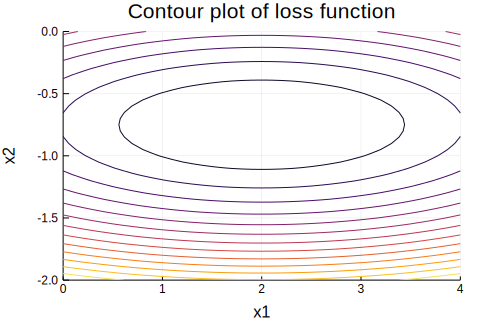

In [12]:
p1 = contour(x1,x2,copy(L'),legend=false)         #notice the transpose: L'
title!("Contour plot of loss function")
xlabel!("x1")
ylabel!("x2")

In [13]:
Sol2 = optimize(x->fn2(x,0.5),[1.0,-0.5])    

printlnPs("The minimum is at : ", Optim.minimizer(Sol2))
println("Compare with the contour plot above\n")   

println(Sol2)

The minimum is at :      2.000    -0.750
Compare with the contour plot above

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [1.0,-0.5]
 * Minimizer: [1.9999665638864563,-0.7499890634452829]
 * Minimum: -5.000000e-01
 * Iterations: 29
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 63


## (extra) Supplying a Function for the Gradient

Supplying a function for calculating the derivatives improves speed and accuracy. See below for an example. (The `inplace = false` means that the function for the derivatives creates a new matrix at each call.)

In [14]:
function g2(x,c)                      #derivates of fn2 wrt. x[1] and x[2], (does not depend on c)
    G = [2*(x[1]-2), 2*4(4*x[2]+3)] 
    return G
end
    
Sol = optimize(x->fn2(x,0.5),x->g2(x,0.5),[1.0,-0.5],inplace = false)
println(Sol)

Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [1.0,-0.5]
 * Minimizer: [2.0000000000000004,-0.7500000000000007]
 * Minimum: -5.000000e-01
 * Iterations: 2
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 9.34e-01 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = -1.75e+00 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.13e-14 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 7
 * Gradient Calls: 7
